In [1]:
import os

import scipy.stats
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
random_seed = 1011

# 1. Data processing

## 1.1 Load data

In [3]:
origin_data = pd.read_csv("data/credit_score_dataset.csv")

In [4]:
origin_data.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,88592,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,NaN,NaN,434,6260,NaN,749,4384,NaN,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,NaN,NaN,3,Not Specified,NaN,19,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,NaN,NaN,14386,1408,NaN,5327,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [5]:
origin_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## 1.2 Data processing

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer


def list_to_one_hot_encoding(df, column_name):
    mlb = MultiLabelBinarizer()
    df = df.join(pd.DataFrame(mlb.fit_transform(df[column_name]),
                              columns=mlb.classes_,
                              index=df.index))
    return df


def convert_credit_history_age(val):
    if isinstance(val, str):
        val_list = val.split()
        val_list = [x.replace("_", "") for x in val_list]
        picked_val = int(val_list[0])
        return picked_val
    else:
        return val


def replace_underscore(val, min_val=-np.inf):
    if isinstance(val, str):
        check_val = val.replace("_", "").strip()
        if check_val == "":
            return np.nan

        check_val = float(check_val)
        if check_val < min_val:
            check_val = np.nan

        return check_val
    else:
        return val


origin_data['Credit_History_Age'].apply(convert_credit_history_age)
import re


def find_number(val):
    if isinstance(val, str):
        num = re.findall(r'[0-9.]+', val)
        return " ".join(num)
    else:
        return val


def one_hot_encode_column(df, column_name):
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop(column_name, axis=1)
    df = df.join(one_hot)
    return df


def split_Type_of_Loan(val):
    if isinstance(val, str):
        val = val.replace("and", "")
        val_list = val.split(",")
        val_list = [x.strip() for x in val_list]
        return val_list
    else:
        return ['No Loan info']

In [7]:
origin_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
data = origin_data.copy()

data['Age'] = data['Age'].apply(replace_underscore)
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Annual_Income'] = data['Annual_Income'].apply(replace_underscore)
data['Annual_Income'] = data['Annual_Income'].fillna(data['Annual_Income'].median())

data['Num_of_Loan'] = data['Num_of_Loan'].apply(replace_underscore)
data['Num_of_Loan'] = data['Num_of_Loan'].fillna(data['Num_of_Loan'].median())

data['Type_of_Loan_List'] = data['Type_of_Loan'].apply(split_Type_of_Loan)
data = list_to_one_hot_encoding(data, 'Type_of_Loan_List')

data = one_hot_encode_column(data, 'Occupation')

data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median())
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace("_", "")
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(data['Num_of_Delayed_Payment'].median())

data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].apply(replace_underscore)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(data['Changed_Credit_Limit'].median())

data['Outstanding_Debt'] = data['Outstanding_Debt'].apply(replace_underscore)
data['Outstanding_Debt'] = data['Outstanding_Debt'].fillna(data['Outstanding_Debt'].median())


data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(data['Num_Credit_Inquiries'].median())

data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_credit_history_age)
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(data['Credit_History_Age'].median())

data = one_hot_encode_column(data, 'Payment_of_Min_Amount')

data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace("_", "").replace("-", "")
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(data['Amount_invested_monthly'].median())

data = one_hot_encode_column(data, 'Payment_Behaviour')

data['Monthly_Balance'] = data['Monthly_Balance'].apply(find_number)
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(data['Monthly_Balance'].median())


## 1.3 Feature engineering

### 1.3.1 Label encoder to generate y

In [9]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Type_of_Loan_List,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan info,Not Specified,Payday Loan,Personal Loan,Student Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22.0,49.574949,80.41529543900253,312.49408867943663,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.27,4.0,Good,809.98,31.944960,18.0,49.574949,118.28022162236736,284.62916249607184,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,9.40,4.0,Good,809.98,28.609352,22.0,49.574949,81.699521264648,331.2098628537912,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22.0,49.574949,199.4580743910713,223.45130972736786,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.27,4.0,Good,809.98,24.797347,22.0,49.574949,41.420153086217326,341.48923103222177,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Credit_Score'].unique())

list(le.classes_)

data['credit_label'] = le.transform(data['Credit_Score'])


### 1.3.3 Feature selection

In [11]:
feature_df = data.copy()

In [12]:
feature_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Type_of_Loan_List,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan info,Not Specified,Payday Loan,Personal Loan,Student Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,credit_label
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22.0,49.574949,80.41529543900253,312.49408867943663,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.27,4.0,Good,809.98,31.944960,18.0,49.574949,118.28022162236736,284.62916249607184,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,9.40,4.0,Good,809.98,28.609352,22.0,49.574949,81.699521264648,331.2098628537912,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22.0,49.574949,199.4580743910713,223.45130972736786,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.27,4.0,Good,809.98,24.797347,22.0,49.574949,41.420153086217326,341.48923103222177,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,0


In [13]:
feature_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Type_of_Loan_List', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan info', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media

In [14]:
selected_df = feature_df[['Credit_Score', 'credit_label', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan info', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Occupation________', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_!@9#%8',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'
]]

In [15]:
selected_df = selected_df.drop_duplicates()
selected_df = selected_df.dropna()

In [16]:
selected_df.shape

(100000, 61)

In [17]:
# columns = selected_df.columns
# scaler = MinMaxScaler((0.01, 0.99))
# scaled_selected_df = scaler.fit_transform(selected_df)
# scaled_selected_df = pd.DataFrame(scaled_selected_df, columns=columns)

In [18]:
sampled_10_scaled_selected_df = selected_df.sample(frac=0.1, random_state=random_seed)
sampled_25_scaled_selected_df = selected_df.sample(frac=0.25, random_state=random_seed)

In [19]:
from sklearn.preprocessing import MinMaxScaler

X = selected_df.drop(["Credit_Score", "credit_label"], axis=1)
y = selected_df[["credit_label"]]

columns = X.columns
scaler = MinMaxScaler((0.01, 0.99))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_sample = sampled_10_scaled_selected_df.drop(["Credit_Score", "credit_label"], axis=1)
y_sample = sampled_10_scaled_selected_df[["credit_label"]]


columns = X_sample.columns
scaler = MinMaxScaler((0.01, 0.99))
X_sample = scaler.fit_transform(X_sample)
X_sample = pd.DataFrame(X_sample, columns=columns)

X_sample_25 = sampled_25_scaled_selected_df.drop(["Credit_Score", "credit_label"], axis=1)
y_sample_25 = sampled_25_scaled_selected_df[["credit_label"]]

columns = X_sample.columns
scaler = MinMaxScaler((0.01, 0.99))
X_sample_25 = scaler.fit_transform(X_sample_25)
X_sample_25 = pd.DataFrame(X_sample_25, columns=columns)

In [ ]:
X.shape

# 2. Clustering

## 2.1 EM

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [21]:
def gmm_bic(estimator, X):
    return -estimator.bic(X)

In [22]:
param_grid = {
    "n_components": range(2, 31),
    "covariance_type": ["full"],
}

In [23]:
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic, n_jobs=-1,
)
grid_search.fit(X_sample)

GridSearchCV(estimator=GaussianMixture(), n_jobs=-1,
             param_grid={'covariance_type': ['full'],
                         'n_components': range(2, 31)},
             scoring=<function gmm_bic at 0x7fd6d4737130>)

In [24]:
# import pandas as pd
# 
# gmm_df = pd.DataFrame(grid_search.cv_results_)[["param_n_components", "param_covariance_type", "mean_test_score"]]
# gmm_df.columns = ["n_components", "covariance_type", "bic_score"]
# # df["mean_test_score"] = -df["mean_test_score"]
# gmm_df.sort_values(by="bic_score", ascending=False).head()

,n_components,covariance_type,bic_score
4,6,full,-82850.613897
1,3,full,-108393.252448
3,5,full,-118022.202993
0,2,full,-121206.582807
2,4,full,-125142.171425


In [104]:
from sklearn.metrics import silhouette_score

gmm_result = []
for n_component in range(2, 31):
    print(f"n_component: {n_component}")
    gmm = GaussianMixture(n_components=n_component, covariance_type='full')
    labels = gmm.fit_predict(X_sample)
    bic_score = gmm.bic(X_sample)
    sh_score = silhouette_score(X_sample, labels, metric='euclidean')
    
    gmm_result.append([n_component, bic_score, sh_score])
    
gmm_df = pd.DataFrame(gmm_result, columns=['n_component', 'bic_score', 'silhouette_score'])

n_component: 2
n_component: 3
n_component: 4
n_component: 5
n_component: 6
n_component: 7
n_component: 8
n_component: 9
n_component: 10
n_component: 11
n_component: 12
n_component: 13
n_component: 14
n_component: 15
n_component: 16
n_component: 17
n_component: 18
n_component: 19
n_component: 20
n_component: 21
n_component: 22
n_component: 23
n_component: 24
n_component: 25
n_component: 26
n_component: 27
n_component: 28
n_component: 29
n_component: 30


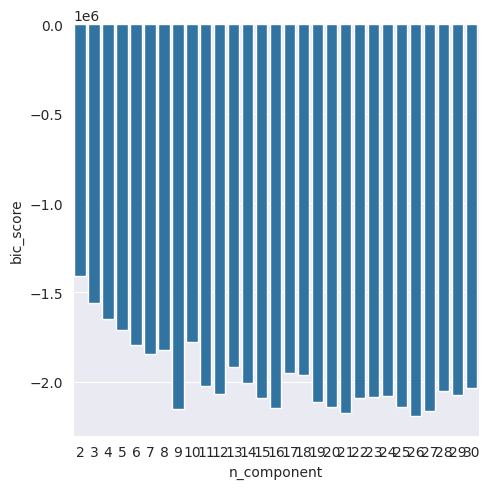

In [106]:
import seaborn as sns

sns.catplot(
    data=gmm_df,
    kind="bar",
    x="n_component",
    y="bic_score",
)
plt.show()

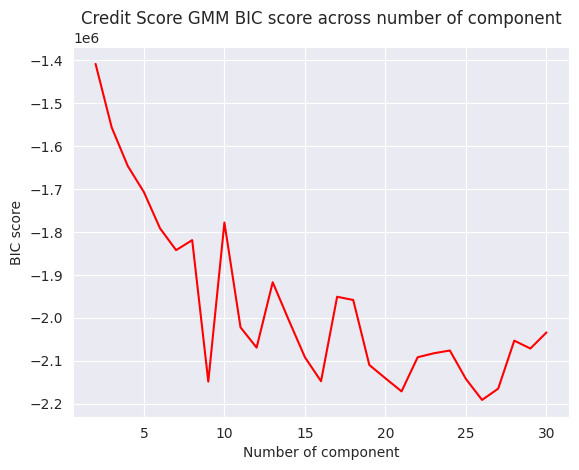

In [121]:
plt.plot(gmm_df['n_component'], gmm_df['bic_score'], color='r')


# sns.catplot(
#     data=gmm_df,
#     kind="bar",
#     x="Number of components",
#     y="BIC score",
#     hue="Type of covariance",
# )
plt.xlabel("Number of component")
plt.ylabel("BIC score")
plt.title("Credit Score GMM BIC score across number of component")
plt.show()

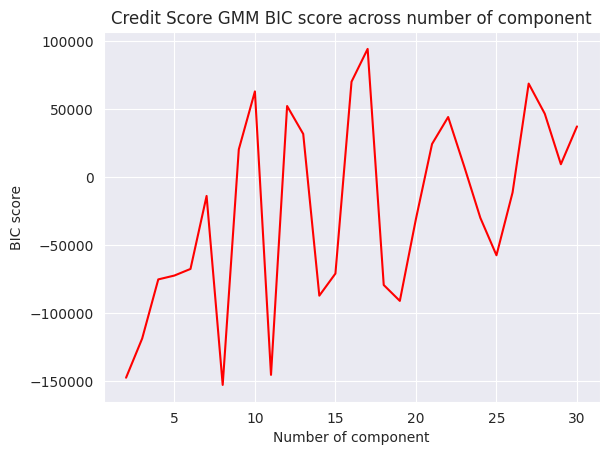

In [122]:
plt.figure()
plt.plot(gmm_df['n_component'], np.gradient(gmm_df['bic_score']), color='r')
plt.xlabel("Number of component")
plt.ylabel("BIC score")
plt.title("Credit Score GMM BIC score across number of component")
plt.show()


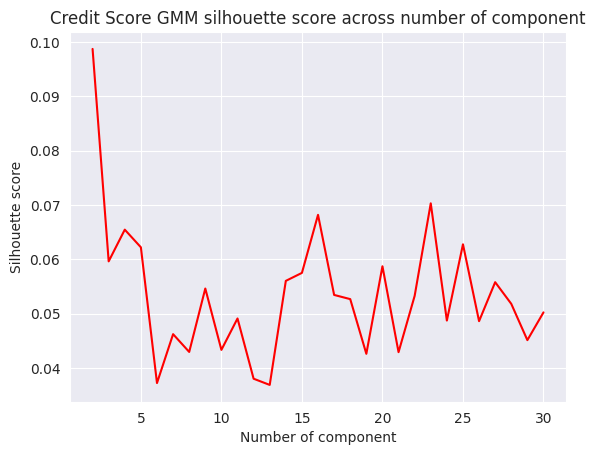

In [124]:
plt.plot(gmm_df['n_component'], gmm_df['silhouette_score'], color='r')


# sns.catplot(
#     data=gmm_df,
#     kind="bar",
#     x="Number of components",
#     y="BIC score",
#     hue="Type of covariance",
# )
plt.xlabel("Number of component")
plt.ylabel("Silhouette score")
plt.title("Credit Score GMM silhouette score across number of component")
plt.show()

In [27]:
best_gmm = GaussianMixture(n_components=28, covariance_type='full')
best_gmm.fit(X_sample)

GaussianMixture(n_components=28)

In [28]:
bic_score = best_gmm.bic(X_sample)

In [29]:
bic_score

-2408339.2841217658

In [30]:
gmm_clusters_labels = best_gmm.predict(X)

In [31]:
len(np.unique(gmm_clusters_labels))

28

## 2.2 DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': np.arange(0.2, 2.4, 0.2),
    'min_samples': [5]
}

best_score = -1
best_params = None

result_scores = []

for params in ParameterGrid(param_grid):
    print("params['eps']:", params['eps'])
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_sample)
    
    if len(np.unique(labels)) < 2:
        continue
    
    # Calculate the silhouette score as the evaluation metric
    score = silhouette_score(X_sample, labels)
    
    if score > best_score:
        best_score = score
        best_params = params
        
    result_scores.append([params['eps'], params['min_samples'], score])
    



params['eps']: 0.2
params['eps']: 0.4
params['eps']: 0.6000000000000001
params['eps']: 0.8
params['eps']: 1.0
params['eps']: 1.2
params['eps']: 1.4000000000000001
params['eps']: 1.6
params['eps']: 1.8
params['eps']: 2.0
params['eps']: 2.2


In [33]:
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']

best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan_labels = best_dbscan.fit_predict(X)

dbscan_score_df = pd.DataFrame(result_scores, columns=['eps', 'min_samples', 'score'])

In [34]:
best_dbscan = DBSCAN(eps=0.4, min_samples=best_min_samples)
best_dbscan_labels = best_dbscan.fit_predict(X)

In [35]:
np.unique(best_dbscan_labels)

array([  -1,    0,    1, ..., 1000, 1001, 1002])

In [36]:
dbscan_score_df

,eps,min_samples,score
0,0.4,5,-0.142398
1,0.6,5,-0.165282
2,0.8,5,-0.171185
3,1.0,5,-0.173551
4,1.2,5,-0.211386
5,1.4,5,-0.222072
6,1.6,5,-0.119174
7,1.8,5,0.057841
8,2.0,5,0.110765
9,2.2,5,0.126181


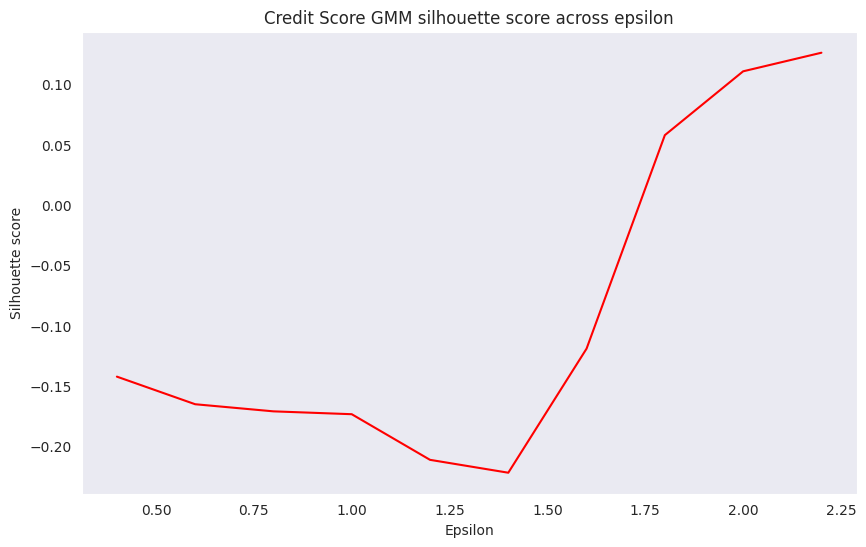

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(dbscan_score_df['eps'], dbscan_score_df['score'], color='r')
plt.xlabel("Epsilon")
plt.ylabel("Silhouette score")
plt.title("Credit Score GMM silhouette score across epsilon")
plt.grid()
plt.show()

In [38]:
# from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, \
#     adjusted_mutual_info_score
# 
# print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
# print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

In [39]:
np.unique(best_dbscan_labels)

array([  -1,    0,    1, ..., 1000, 1001, 1002])

# 3. Dimensionality Reduction

## 3.1 PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=random_seed)
pca.fit(X_sample)

PCA(n_components=30, random_state=1011)

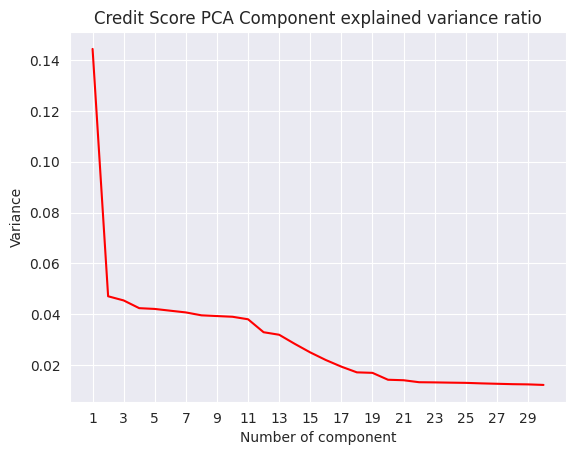

In [126]:
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, color='r')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Number of component')
plt.ylabel('Variance')
plt.title('Credit Score PCA Component explained variance ratio')
plt.show()


In [129]:
X_reduced_PCA = PCA(n_components=12).fit_transform(X_sample_25)
# X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

In [130]:
X_reduced_PCA.shape

(25000, 12)

In [131]:
os.makedirs("output", exist_ok=True)

In [132]:
np.save("X_reduced_PCA.npy", X_reduced_PCA)

## 3.2 ICA

In [133]:
from sklearn.decomposition import FastICA

ica_kurtosis_list = []
best_kurtosis = -np.inf
best_n_component = -1

for n_component in range(1, 31):
    X_ica = FastICA(n_components=n_component).fit_transform(X)
    kurtosis = scipy.stats.kurtosis(X_ica)
    mean_kurtosis = np.mean(kurtosis)/n_component
    ica_kurtosis_list.append([n_component, mean_kurtosis])
    
    if mean_kurtosis > best_kurtosis:
        best_kurtosis = mean_kurtosis
        best_n_component = n_component
    
ica_kurtosis_df = pd.DataFrame(ica_kurtosis_list, columns=['n_component', 'kurtosis_val'])

KeyboardInterrupt: 

In [ ]:
best_n_component

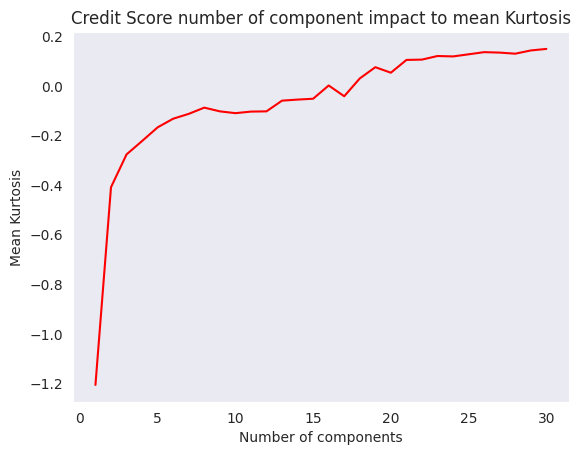

In [134]:
plt.plot(ica_kurtosis_df['n_component'], ica_kurtosis_df['kurtosis_val'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Mean Kurtosis')
plt.title('Credit Score number of component impact to mean Kurtosis')
plt.grid()
plt.savefig('bc_ica_kurtosis.png')
plt.show()

In [135]:
X_reduced_ICA = FastICA(n_components = 8).fit_transform(X_sample_25)
# X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=42)

In [136]:
np.save("X_reduced_ICA.npy", X_reduced_ICA)

## 3.3 RP

In [51]:
from sklearn.metrics import mean_squared_error
from numpy.linalg import pinv
from sklearn import random_projection 
rp_gaussian_reconstruction_mse = []

best_mse = np.inf
best_n_component = -1

for n_component in range(2,31):
    mean_mse = []
    for j in range(5):
        rp_gaussian = random_projection.GaussianRandomProjection(n_components=n_component)
        X_rp_gaussian = rp_gaussian.fit_transform(X)
        
        X_reconstruction = rp_gaussian.inverse_transform(X_rp_gaussian)

        mse = mean_squared_error(X, X_reconstruction)
        mean_mse.append(mse)

    rp_gaussian_reconstruction_mse.append([n_component, np.mean(mean_mse)])

# plt.plot(np.arange(1,30),reconstruction_error)
# plt.fill_between(np.arange(1,30),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
# plt.xlabel('Components')
# plt.ylabel('Reconstruction Error for RP')
# plt.title('Reconstruction error vs. Number of Components for RP (BCW)')
# plt.grid()
# plt.savefig('bc_rp_error.png')
# plt.show()

In [52]:
rp_gaussian_mse_df = pd.DataFrame(rp_gaussian_reconstruction_mse, columns=['n_component', 'reconstruction_mse'])
rp_gaussian_mse_df

,n_component,reconstruction_mse
0,2,0.127525
1,3,0.125932
2,4,0.123657
3,5,0.121344
4,6,0.119129
5,7,0.119303
6,8,0.116696
7,9,0.110677
8,10,0.108996
9,11,0.108446


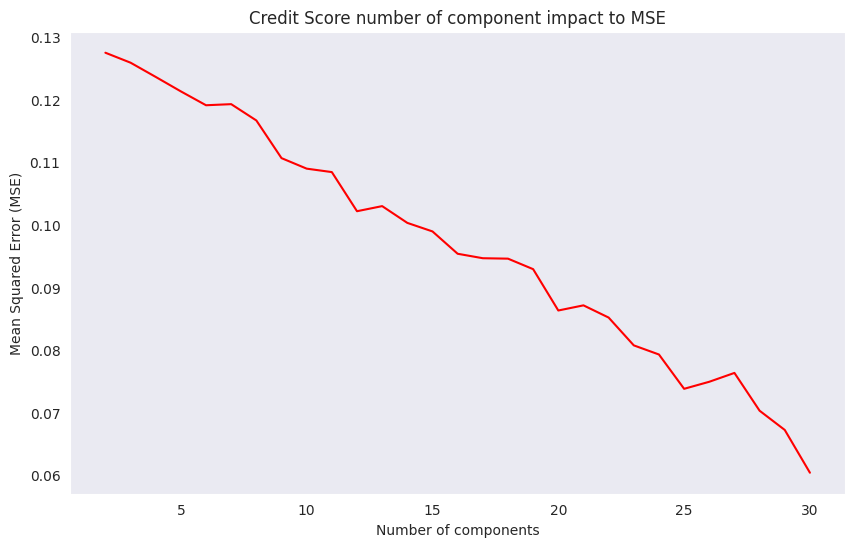

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(rp_gaussian_mse_df['n_component'], rp_gaussian_mse_df['reconstruction_mse'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Credit Score number of component impact to MSE')
plt.grid()
plt.show()

In [138]:
rp_gaussian = random_projection.GaussianRandomProjection(n_components=10)
X_reduced_rp_gaussian = rp_gaussian.fit_transform(X_sample_25)

In [139]:
np.save("X_reduced_rp_gaussian.npy", X_reduced_rp_gaussian)

In [140]:
# rp_gaussian = random_projection.SparseRandomProjection()
# 
# 
# from sklearn.metrics import mean_squared_error
# from numpy.linalg import pinv
# from sklearn import random_projection 
# rp_sparse_reconstruction_mse = []
# 
# for n_component in range(2,31):
#     mean_mse = []
#     for j in range(5):
#         rp_sparse = random_projection.SparseRandomProjection(n_components=n_component)
#         X_rp_sparse = rp_sparse.fit_transform(X)
#         X_reconstruction = rp_sparse.inverse_transform(X_rp_sparse)
# 
#         mse = mean_squared_error(X, X_reconstruction)
#         mean_mse.append(mse)
#         
#     rp_sparse_reconstruction_mse.append([n_component, np.mean(mean_mse)])


## 3.4 Locally Linear Embedding

In [141]:
# from sklearn.manifold import LocallyLinearEmbedding
# 
# lle = LocallyLinearEmbedding(n_components=10, method='standard', n_neighbors=10, n_jobs=-1)
# lle.fit(X)

In [58]:
from sklearn.manifold import LocallyLinearEmbedding

lle_reconstruction_errors = []
best_error = -np.inf
best_n_component = -1

for n_component in range(2,31):
    print(f"n_component: {n_component}") 
    lle = LocallyLinearEmbedding(n_components=n_component, method='standard', n_neighbors=10, n_jobs=-1)
    lle.fit(X_sample)
    error = lle.reconstruction_error_
    
    if error < best_error:
        best_error = error
        best_n_component = n_component
    
    lle_reconstruction_errors.append([n_component, error])

n_component: 2
n_component: 3
n_component: 4
n_component: 5
n_component: 6
n_component: 7
n_component: 8
n_component: 9
n_component: 10
n_component: 11
n_component: 12
n_component: 13
n_component: 14
n_component: 15
n_component: 16
n_component: 17
n_component: 18
n_component: 19
n_component: 20
n_component: 21
n_component: 22
n_component: 23
n_component: 24
n_component: 25
n_component: 26
n_component: 27
n_component: 28
n_component: 29
n_component: 30


In [59]:
lle_reconstruction_errors_df = pd.DataFrame(lle_reconstruction_errors, columns=['n_component',  'reconstruction_error'])

In [60]:
lle_reconstruction_errors_df

,n_component,reconstruction_error
0,2,1.442217e-16
1,3,2.808440e-16
2,4,2.777753e-16
3,5,1.150326e-16
4,6,3.220763e-16
5,7,7.514311e-16
6,8,5.527333e-16
7,9,-1.200870e-15
8,10,3.609469e-15
9,11,2.115834e-06


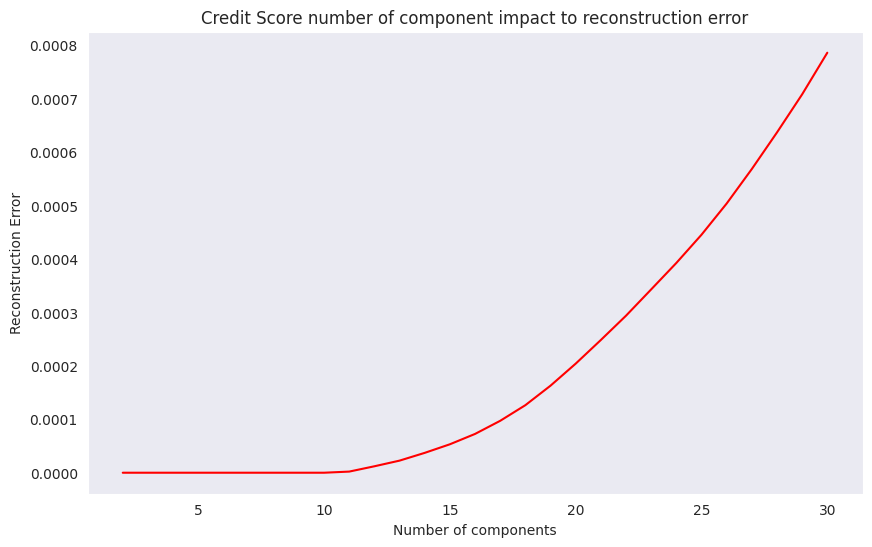

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(lle_reconstruction_errors_df['n_component'], lle_reconstruction_errors_df['reconstruction_error'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Credit Score number of component impact to reconstruction error')
plt.grid()
plt.show()

In [62]:
print(best_n_component)

-1


In [143]:
lle = LocallyLinearEmbedding(n_components=8, method='standard', n_neighbors=10, n_jobs=-1)


In [144]:
X_reduced_lle = lle.fit_transform(X_sample_25)

In [145]:
np.save("X_reduced_lle.npy", X_reduced_lle)

# 4. Clustering on dimension reduction datasets  

In [146]:
def run_gmm_comparison(X_data, n_component_range=range(2, 31)):
    gmm_reduced_result = []
    for n_component in n_component_range:
        gmm = GaussianMixture(n_components=n_component, covariance_type='full')
        labels = gmm.fit_predict(X_data)
        bic_score = -gmm.bic(X_data)
        sh_score = silhouette_score(X_data, labels, metric='euclidean')
        
        gmm_reduced_result.append([n_component, bic_score, sh_score])
        
    gmm_reduced_result_df = pd.DataFrame(gmm_reduced_result, columns=['n_component', 'bic_score', 'silhouette_score'])
    
    return gmm_reduced_result_df

In [147]:
def run_dbscan_comparison(X_data, eps_range = np.arange(0.2, 2.4, 0.2)):
    cluster_result = []

    best_score = -np.inf
    best_eps = -1
    
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X_data)
        
        
        if len(np.unique(labels)) <=2:
            continue
    
        # Calculate the silhouette score as the evaluation metric
        score = silhouette_score(X_data, labels)
    
        if score > best_score:
            best_score = score
            best_eps = eps
    
        cluster_result.append([eps, score])
    cluster_result_df = pd.DataFrame(cluster_result, columns=['eps', 'silhouette_score'])
    return cluster_result_df

In [148]:
def plot_gmm_clustering_comparison(cluster_result_df, x_label, y_label, data_type=""):
    plt.figure()
    # plt.plot(range(2, 31), gmm_pca_reduced_result_df['bic_score'], color='r', label='bic_score')
    plt.plot(cluster_result_df[x_label], cluster_result_df[y_label], color='r', label=y_label)
    plt.xlabel("Number of component")
    plt.ylabel("Silhouette score")
    plt.title(f"Credit Score GMM component impact to Silhouette score of {data_type}")
    plt.grid()
    plt.show()
    
    
def plot_dbscan_clustering_comparison(cluster_result_df, x_label, y_label, data_type=""):
    plt.figure()
    # plt.plot(range(2, 31), gmm_pca_reduced_result_df['bic_score'], color='r', label='bic_score')
    plt.plot(cluster_result_df[x_label], cluster_result_df[y_label], color='r', label=y_label)
    plt.xlabel("Epsilon")
    plt.ylabel("Silhouette score")
    plt.title(f"Credit Score DBSCAN epsilon impact to Silhouette score of {data_type}")
    plt.grid()
    plt.show()

In [149]:
def sample_from_array(np_arr, sample_percent=0.25):
    sample_size = int(np_arr.shape[0]*sample_percent)
    random_indices = np.random.choice(np_arr.shape[0],  size=sample_size,  replace=False) 
    sampled_data = np_arr[random_indices, :]
    return sampled_data

## 4.1 PCA reduced data with GMM clustering

In [70]:
# gmm_reduced_result = []
# 
# gmm = GaussianMixture(n_components=2, covariance_type='full')
# labels = gmm.fit_predict(X_reduced_PCA)
# bic_score = -gmm.bic(X_reduced_PCA)
# sh_score = silhouette_score(X_reduced_PCA, labels, metric='euclidean')
# 
# gmm_reduced_result.append([2, bic_score, sh_score])
#     
# gmm_reduced_result_df = pd.DataFrame(gmm_reduced_result, columns=['n_component', 'bic_score', 'silhouette_score'])

In [150]:
X_reduced_sampled = sample_from_array(X_reduced_PCA, sample_percent=0.1)
print(X_reduced_sampled.shape)
gmm_reduced_result_df_pca = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_pca.to_csv("gmm_reduced_result_df_pca.csv", index=False)

(2500, 12)


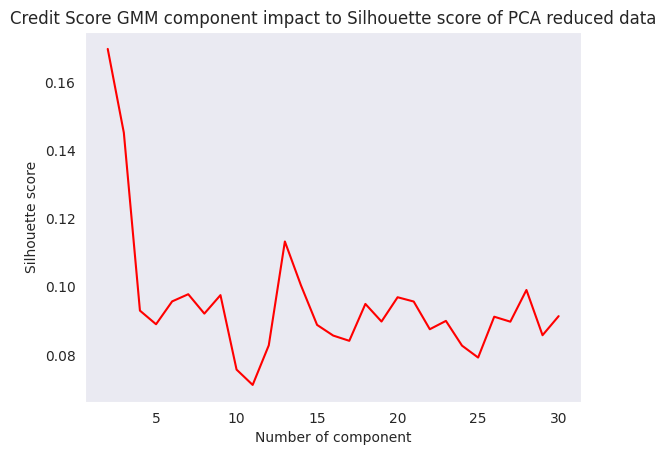

In [151]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_pca, x_label='n_component', y_label='silhouette_score', data_type="PCA reduced data")

In [152]:
best_cluster_gmm_pca = GaussianMixture(n_components=8, covariance_type='full')
cluster_gmm_pca_labels = best_cluster_gmm_pca.fit_predict(X_reduced_PCA)

## 4.2 ICA reduced data with GMM clustering

In [153]:
X_reduced_sampled = sample_from_array(X_reduced_ICA, sample_percent=0.1)
gmm_reduced_result_df_ica = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_ica.to_csv("gmm_reduced_result_df_ica.csv", index=False)

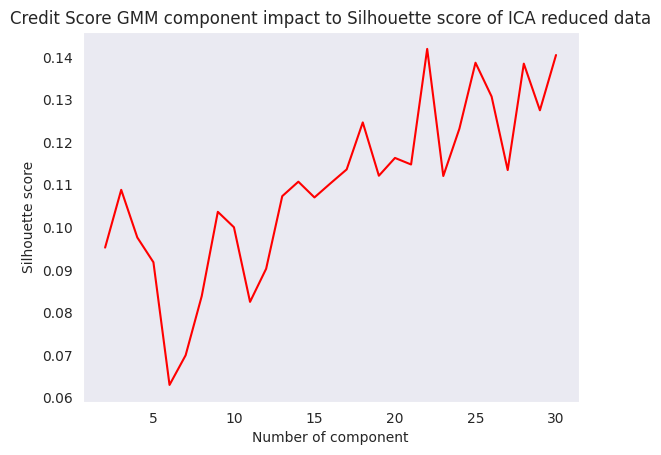

In [154]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_ica, x_label='n_component', y_label='silhouette_score', data_type='ICA reduced data')

In [155]:
best_cluster_gmm_rp = GaussianMixture(n_components=8, covariance_type='full')
cluster_gmm_rp_labels = best_cluster_gmm_rp.fit_predict(X_reduced_ICA)

## 4.3 RP reduced data with GMM clustering

In [156]:
X_reduced_sampled = sample_from_array(X_reduced_rp_gaussian, sample_percent=0.1)
gmm_reduced_result_df_rp = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_rp.to_csv("gmm_reduced_result_df_rp.csv", index=False)

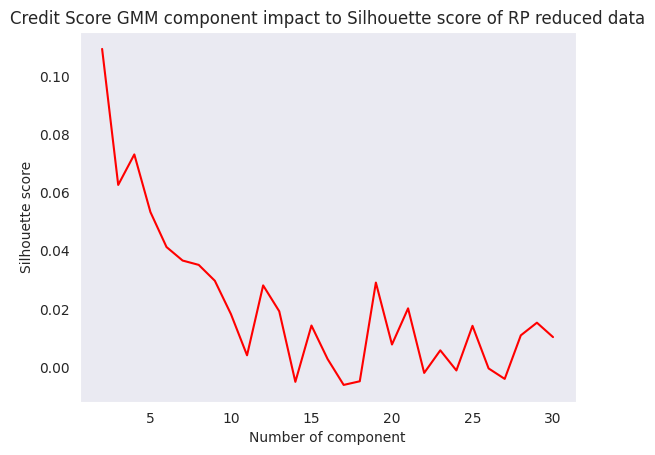

In [157]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_rp, x_label='n_component', y_label='silhouette_score', data_type='RP reduced data')

In [158]:
best_cluster_gmm_rp = GaussianMixture(n_components=8, covariance_type='full')
cluster_gmm_labels_rp = best_cluster_gmm_rp.fit_predict(X_reduced_rp_gaussian)

## 4.4 LLE reduced data with GMM clustering

In [159]:
X_reduced_sampled = sample_from_array(X_reduced_lle, sample_percent=0.1)
gmm_reduced_result_df_lle = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_lle.to_csv("gmm_reduced_result_df_pca.csv", index=False)

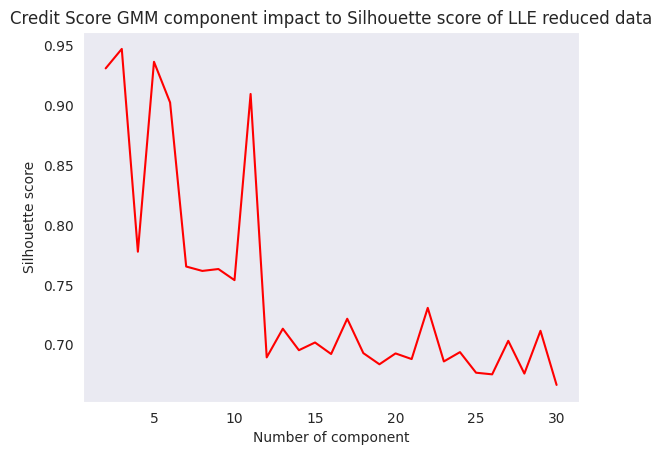

In [160]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_lle, x_label='n_component', y_label='silhouette_score', data_type='LLE reduced data')

In [161]:
best_cluster_gmm_lle = GaussianMixture(n_components=8, covariance_type='full')
cluster_gmm_pca_labels = best_cluster_gmm_pca.fit_predict(X_reduced_lle)

## 4.5 PCA reduced data with DBSCAN clustering

In [162]:
X_reduced_PCA.shape

(25000, 12)

In [163]:
X_reduced_sampled = sample_from_array(X_reduced_PCA, sample_percent=0.1)
dbscan_reduced_result_df_pca = run_dbscan_comparison(X_reduced_sampled, 
                                                     eps_range=np.arange(0.1, 10, 0.1))
dbscan_reduced_result_df_pca.to_csv("dbscan_reduced_result_df_pca.csv", index=False)

In [164]:
dbscan_reduced_result_df_pca

,eps,silhouette_score
0,0.1,-0.165034
1,0.2,-0.092543
2,0.3,-0.078717
3,0.4,-0.051484
4,0.5,-0.040206
5,0.6,-0.026855
6,0.7,-0.023810
7,0.8,-0.067781
8,0.9,-0.123746
9,1.0,0.064495


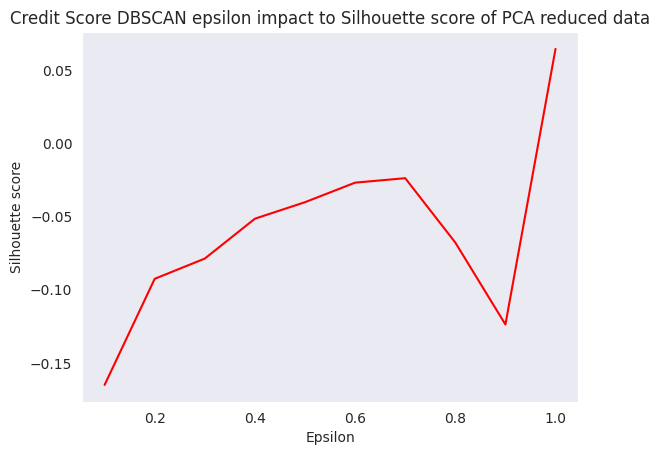

In [165]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_pca, x_label='eps', y_label='silhouette_score', data_type='PCA reduced data')

In [166]:
best_cluster_dbscan_pca = bscan = DBSCAN(eps=0.9, min_samples=5)
cluster_dbscan_pca_labels = best_cluster_dbscan_pca.fit_predict(X_reduced_PCA)

## 4.6 ICA reduced data with DBSCAN clustering 

In [167]:
X_reduced_sampled = sample_from_array(X_reduced_ICA, sample_percent=0.1)
dbscan_reduced_result_df_ica = run_dbscan_comparison(X_reduced_sampled,
                                                     eps_range=np.arange(0.1, 10, 0.1)
                                                     )
dbscan_reduced_result_df_ica.to_csv("dbscan_reduced_result_df_ica.csv", index=False)

In [168]:
dbscan_reduced_result_df_ica

,eps,silhouette_score
0,0.1,-0.195050
1,0.2,-0.189312
2,0.3,-0.137303
3,0.4,-0.105124
4,0.5,-0.076287
5,0.6,-0.055996
6,0.7,-0.011816
7,0.8,0.020959
8,0.9,0.039929
9,1.0,0.055021


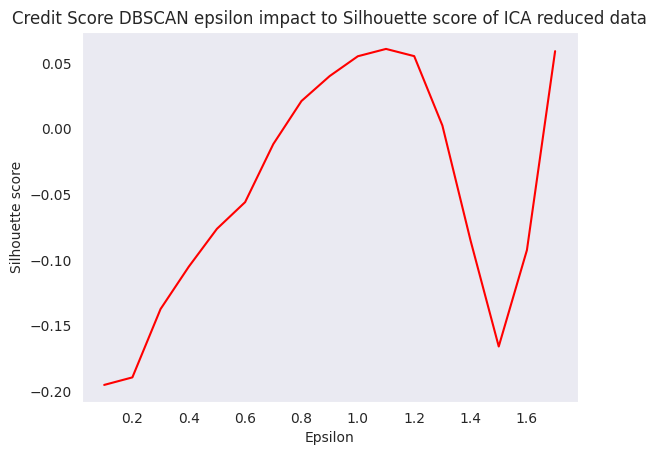

In [169]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_ica, x_label='eps', y_label='silhouette_score', data_type='ICA reduced data')

In [170]:
best_cluster_dbscan_ica = DBSCAN(eps=4.5, min_samples=5)
cluster_dbscan_ica_labels = best_cluster_dbscan_ica.fit_predict(X_reduced_ICA)

# 4.7 RP reduced data with DBSCAN clustering

In [171]:
X_reduced_sampled = sample_from_array(X_reduced_rp_gaussian, sample_percent=0.1)
dbscan_reduced_result_df_rp = run_dbscan_comparison(X_reduced_sampled,
                                                    eps_range=np.arange(0.1, 5, 0.1)
                                                    )
dbscan_reduced_result_df_rp.to_csv("dbscan_reduced_result_df_rp.csv", index=False)

In [172]:
dbscan_reduced_result_df_rp

,eps,silhouette_score
0,0.7,-0.113561
1,0.8,-0.314740
2,0.9,-0.339808
3,1.0,-0.332195
4,1.1,-0.277402
5,1.2,-0.154701
6,1.3,0.046508


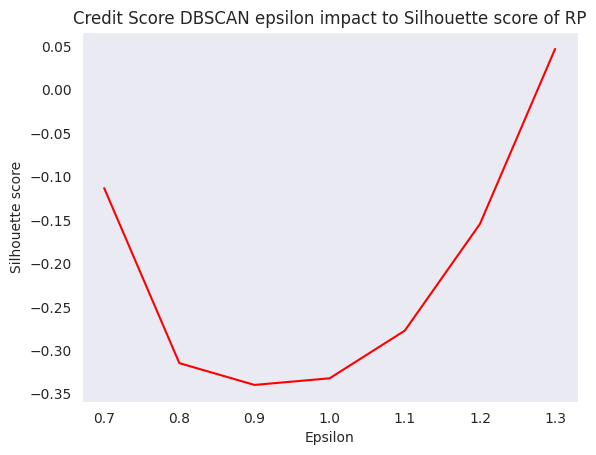

In [173]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_rp, x_label='eps', y_label='silhouette_score', data_type='RP')

In [174]:
best_cluster_dbscan_rp = DBSCAN(eps=2.0, min_samples=5)
cluster_dbscan_rp_labels = best_cluster_dbscan_rp.fit_predict(X_reduced_rp_gaussian)

## 4.8 LLE reduced data with DBSCAN clustering

In [175]:
X_reduced_sampled = sample_from_array(X_reduced_lle, sample_percent=0.1)
dbscan_reduced_result_df_lle = run_dbscan_comparison(X_reduced_sampled, eps_range=np.arange(0.001, 0.1, 0.001))
dbscan_reduced_result_df_lle.to_csv("dbscan_reduced_result_df_lle.csv", index=False)

In [176]:
dbscan_reduced_result_df_lle

,eps,silhouette_score
0,0.001,0.223762
1,0.002,0.670313
2,0.003,0.506960
3,0.004,0.791491
4,0.005,0.740729
...,...,...
94,0.095,0.952369
95,0.096,0.952369
96,0.097,0.952369
97,0.098,0.952369


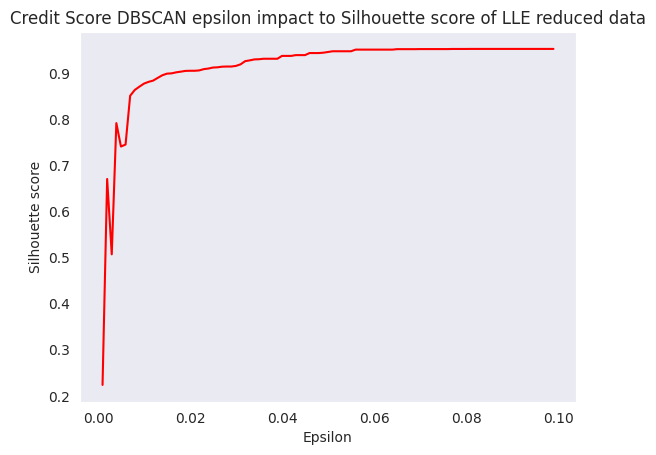

In [177]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_lle, x_label='eps', y_label='silhouette_score', data_type='LLE reduced data')

In [178]:
best_cluster_dbscan_lle = DBSCAN(eps=0.02, min_samples=5)
cluster_dbscan_lle_labels = best_cluster_dbscan_rp.fit_predict(X_reduced_lle)